<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-09-27 14:46:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  45.3MB/s    in 4.2s    

2025-09-27 14:46:31 (47.6 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 174.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 188.4 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 171.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 118.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 142.8 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


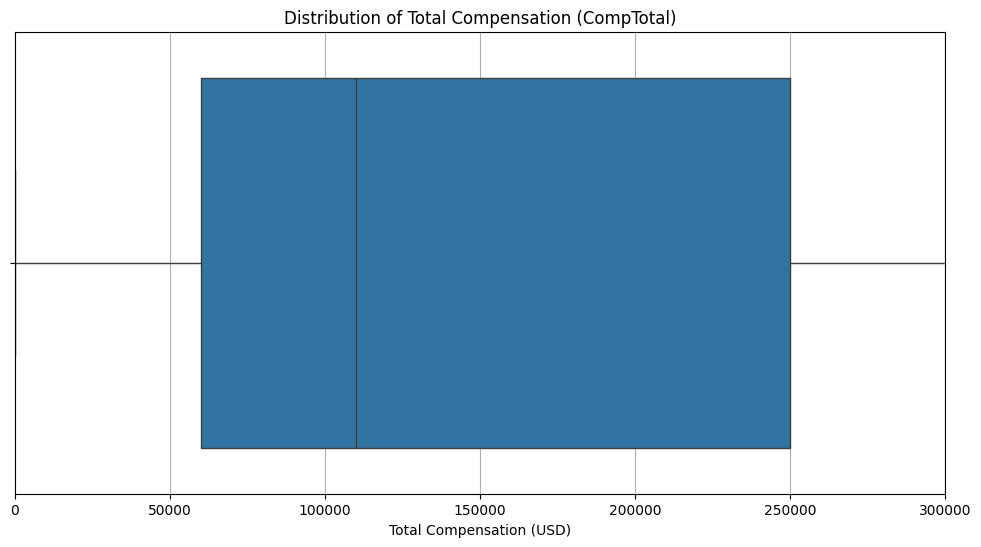

In [11]:
!pip install seaborn
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# --- Task: Box Plot of CompTotal (Total Compensation) ---

# Define the SQL query to select the 'CompTotal' column from the 'main' table
QUERY = "SELECT CompTotal FROM main"

# Execute the query and load the result into a pandas DataFrame
df_comp = pd.read_sql_query(QUERY, conn)

# --- Data Cleaning ---
# Drop rows where the compensation value is missing to ensure an accurate plot
df_comp.dropna(inplace=True)

# --- Visualization with a Box Plot ---
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_comp['CompTotal'])

# Add titles and labels for clarity
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation (USD)')
plt.grid(True)

# Note: The 'CompTotal' column has extreme outliers.
# For a more detailed view of the main distribution, we can limit the x-axis.
plt.xlim(0, 300000) # You can adjust or remove this line to see the full range of outliers

plt.show()

# Close the database connection
conn.close()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


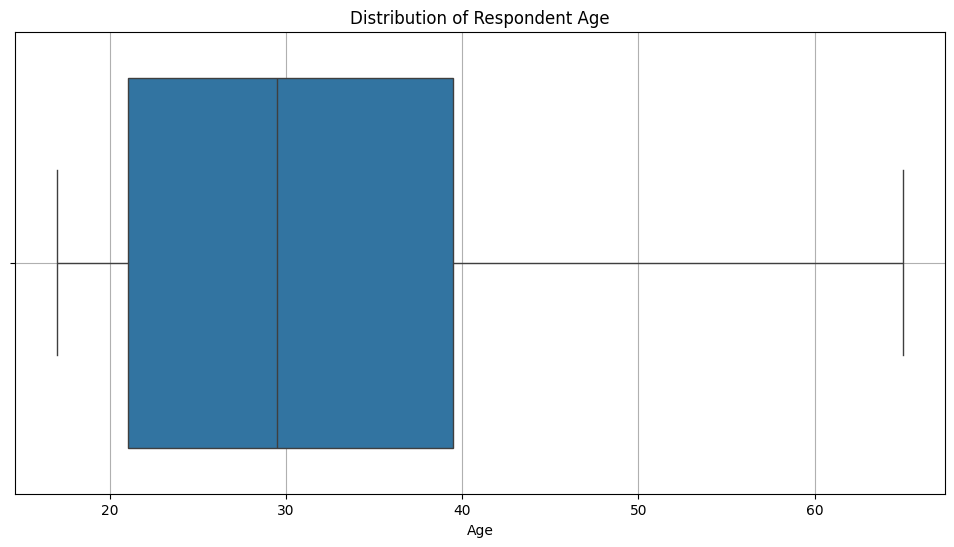

In [12]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# --- Task: Box Plot of Age (converted to numeric values) ---

# Define the SQL query to select the 'Age' column from the 'main' table
QUERY = "SELECT Age FROM main"

# Execute the query and load the result into a pandas DataFrame
df_age = pd.read_sql_query(QUERY, conn)

# --- Data Cleaning and Transformation ---
# Drop rows where the Age value is missing
df_age.dropna(inplace=True)

# Define a mapping from the string-based age ranges to a representative numeric value (midpoint)
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 65
}

# Apply the mapping to create a new numeric 'Age' column
df_age['Age_Numeric'] = df_age['Age'].map(age_map)

# Drop any rows that couldn't be mapped (e.g., 'Prefer not to say')
df_age.dropna(subset=['Age_Numeric'], inplace=True)


# --- Visualization with a Box Plot ---
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_age['Age_Numeric'])

# Add titles and labels for clarity
plt.title('Distribution of Respondent Age')
plt.xlabel('Age')
plt.grid(True)
plt.show()

# Close the database connection
conn.close()



### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


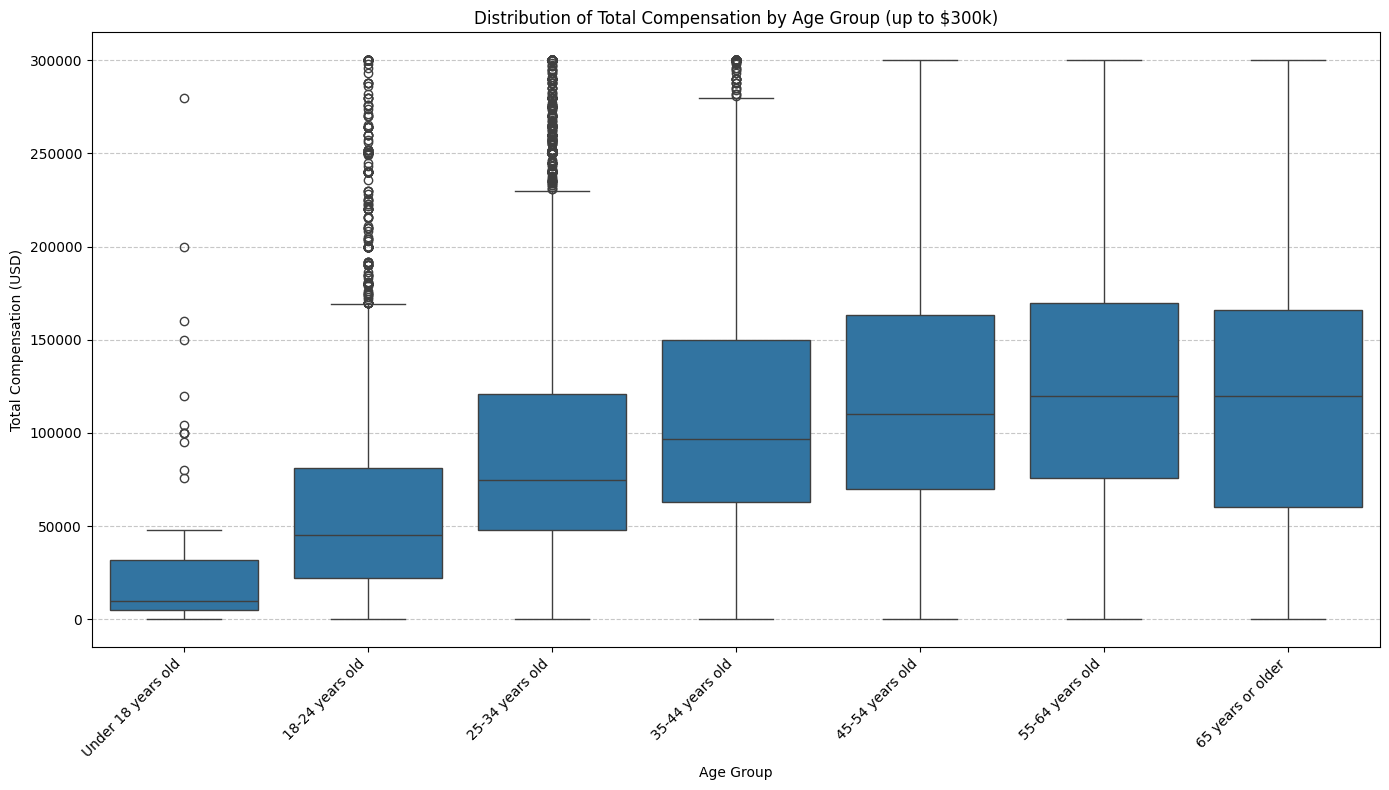

In [13]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# --- Task: Box Plot of CompTotal Grouped by Age Groups ---

# Define the SQL query to select both 'Age' and 'CompTotal' from the 'main' table
QUERY = "SELECT Age, CompTotal FROM main"

# Execute the query and load the result into a pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# --- Data Cleaning ---
# Drop rows where either 'Age' or 'CompTotal' is missing
df.dropna(subset=['Age', 'CompTotal'], inplace=True)

# Filter out extreme outliers in compensation for a more readable plot
# We focus on compensation up to $300,000
df_filtered = df[df['CompTotal'] <= 300000]

# Define the logical order for the age groups for plotting
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

# --- Visualization with a Box Plot ---
plt.figure(figsize=(14, 8))
sns.boxplot(x='Age', y='CompTotal', data=df_filtered, order=age_order)

# Add titles and labels for clarity
plt.title('Distribution of Total Compensation by Age Group (up to $300k)')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation (USD)')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Close the database connection
conn.close()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


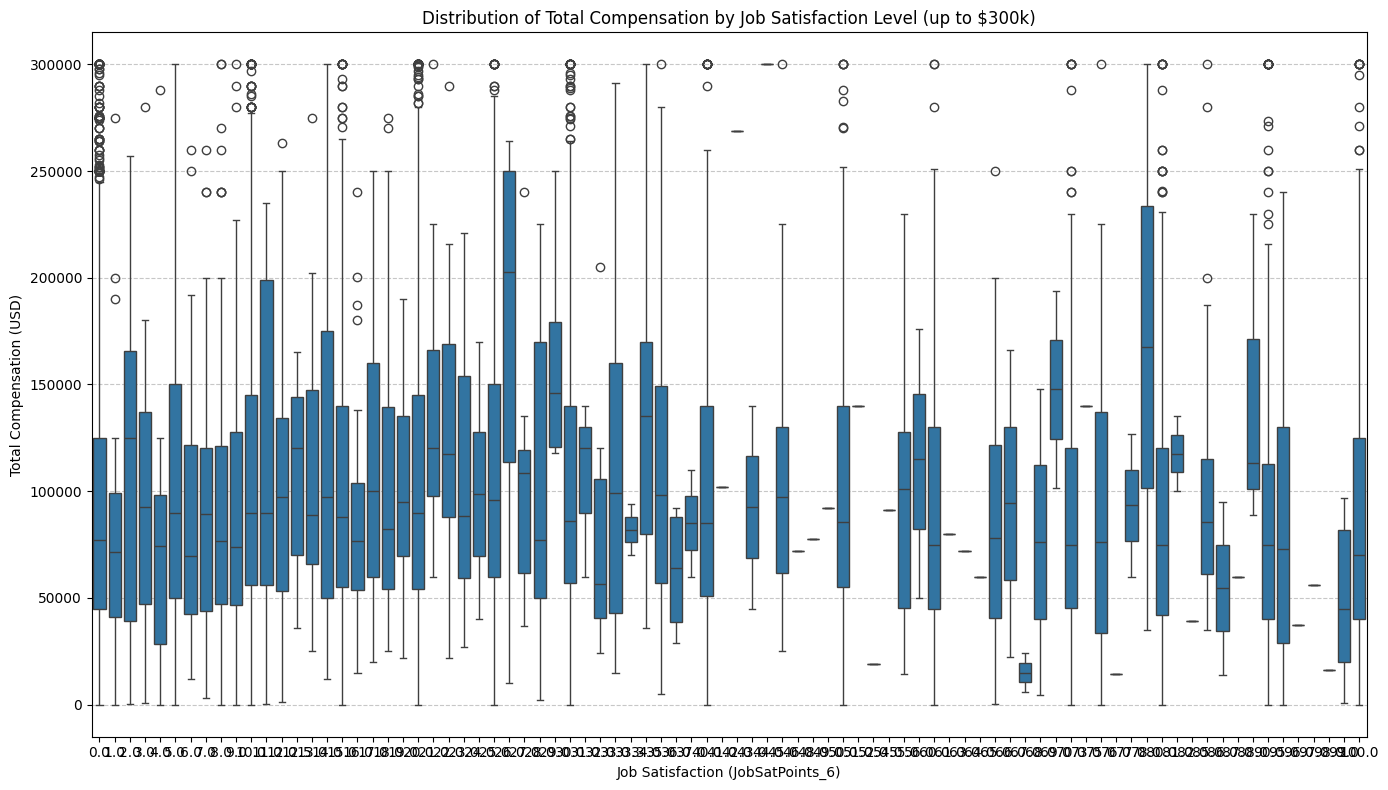

In [14]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# --- Task: Box Plot of CompTotal Grouped by Job Satisfaction ---

# Define the SQL query to select both 'JobSatPoints_6' and 'CompTotal' from the 'main' table
QUERY = "SELECT JobSatPoints_6, CompTotal FROM main"

# Execute the query and load the result into a pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# --- Data Cleaning ---
# Drop rows where either 'JobSatPoints_6' or 'CompTotal' is missing
df.dropna(subset=['JobSatPoints_6', 'CompTotal'], inplace=True)

# Filter out extreme outliers in compensation for a more readable plot
# We focus on compensation up to $300,000
df_filtered = df[df['CompTotal'] <= 300000]

# --- Visualization with a Box Plot ---
plt.figure(figsize=(14, 8))
sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=df_filtered)

# Add titles and labels for clarity
plt.title('Distribution of Total Compensation by Job Satisfaction Level (up to $300k)')
plt.xlabel('Job Satisfaction (JobSatPoints_6)')
plt.ylabel('Total Compensation (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Close the database connection
conn.close()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


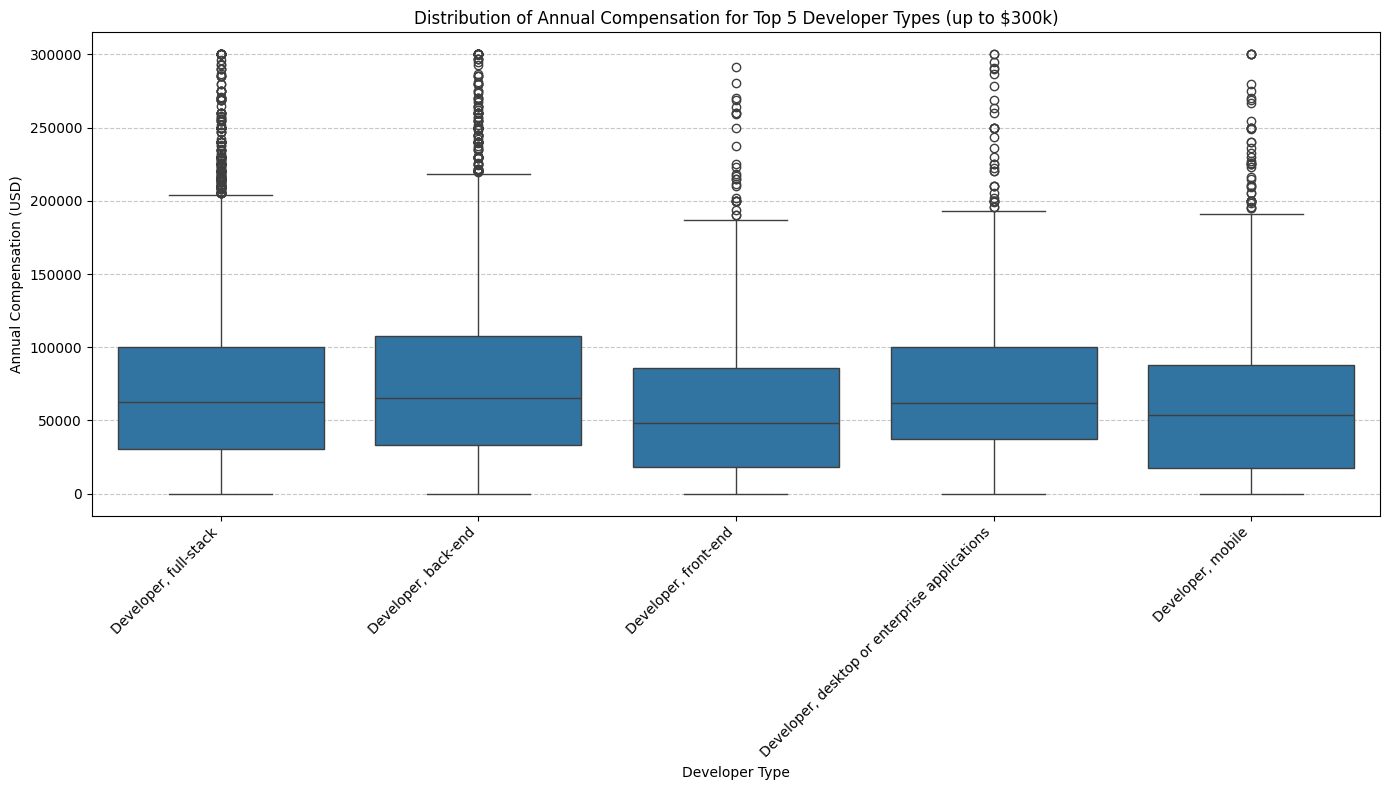

In [15]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# --- Task: Box Plot of ConvertedCompYearly for the Top 5 Developer Types ---

# Define the SQL query to select 'DevType' and 'ConvertedCompYearly'
QUERY = "SELECT DevType, ConvertedCompYearly FROM main"

# Execute the query and load the result into a pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# --- Data Cleaning and Preparation ---
# Drop rows where either column is missing
df.dropna(subset=['DevType', 'ConvertedCompYearly'], inplace=True)

# Find the top 5 most common developer types
# First, split the semicolon-separated strings and count each type
top_dev_types = df['DevType'].str.split(';').explode().value_counts().nlargest(5).index

# Create a new DataFrame that only includes respondents who identify as one of the top 5 types
# We also need to "explode" the original DataFrame to handle multiple roles per respondent
df_exploded = df.assign(DevType=df['DevType'].str.split(';')).explode('DevType')
df_top5 = df_exploded[df_exploded['DevType'].isin(top_dev_types)]

# Filter out extreme salary outliers for a clearer plot
df_filtered = df_top5[df_top5['ConvertedCompYearly'] <= 300000]


# --- Visualization with a Box Plot ---
plt.figure(figsize=(14, 8))
sns.boxplot(x='DevType', y='ConvertedCompYearly', data=df_filtered, order=top_dev_types)

# Add titles and labels for clarity
plt.title('Distribution of Annual Compensation for Top 5 Developer Types (up to $300k)')
plt.xlabel('Developer Type')
plt.ylabel('Annual Compensation (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Close the database connection
conn.close()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


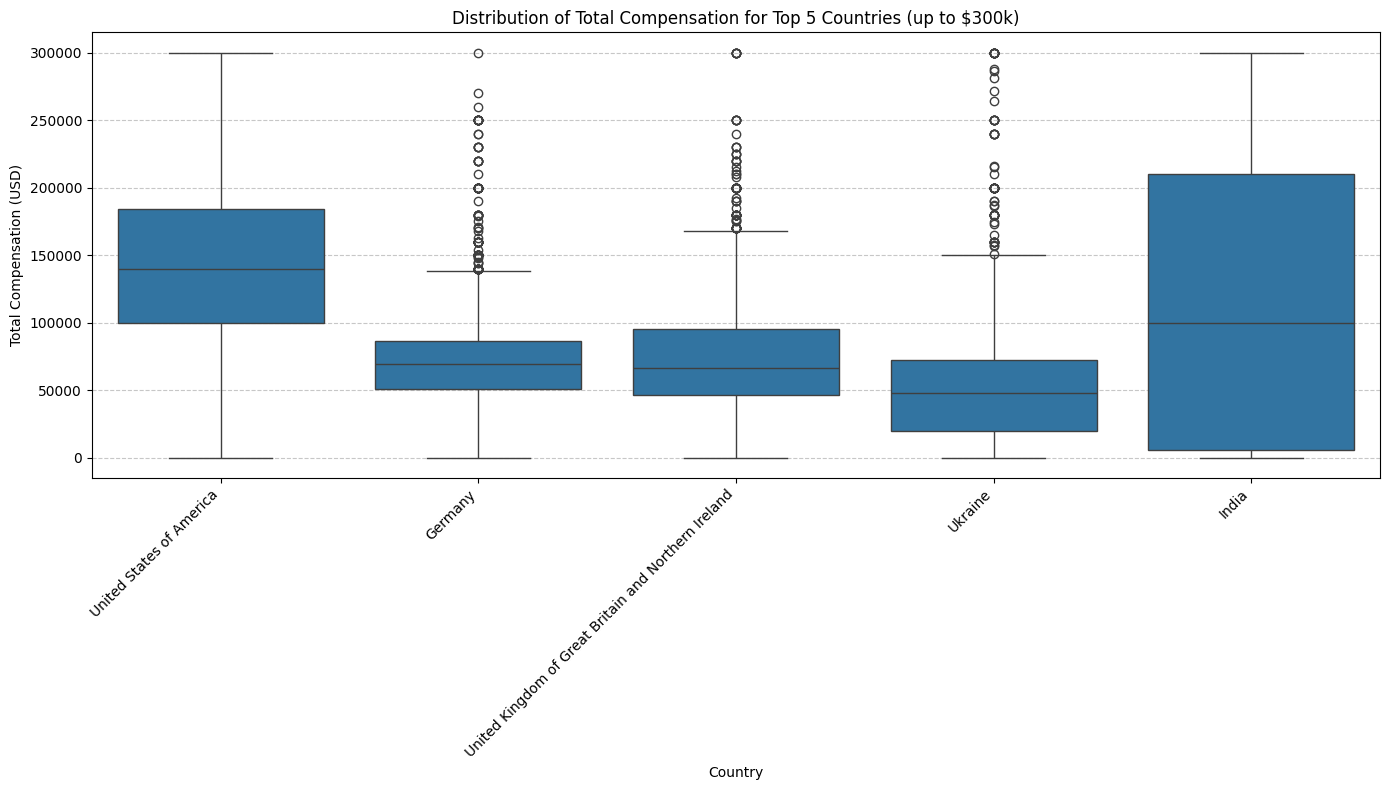

In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# --- Task: Box Plot of CompTotal for the Top 5 Countries ---

# Define the SQL query to select 'Country' and 'CompTotal'
QUERY = "SELECT Country, CompTotal FROM main"

# Execute the query and load the result into a pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# --- Data Cleaning and Preparation ---
# Drop rows where either column is missing
df.dropna(subset=['Country', 'CompTotal'], inplace=True)

# Find the top 5 most common countries by respondent count
top_5_countries = df['Country'].value_counts().nlargest(5).index

# Create a new DataFrame that only includes respondents from the top 5 countries
df_top5 = df[df['Country'].isin(top_5_countries)]

# Filter out extreme salary outliers for a clearer plot
df_filtered = df_top5[df_top5['CompTotal'] <= 300000]


# --- Visualization with a Box Plot ---
plt.figure(figsize=(14, 8))
sns.boxplot(x='Country', y='CompTotal', data=df_filtered, order=top_5_countries)

# Add titles and labels for clarity
plt.title('Distribution of Total Compensation for Top 5 Countries (up to $300k)')
plt.xlabel('Country')
plt.ylabel('Total Compensation (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Close the database connection
conn.close()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_300/3208383679.py:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


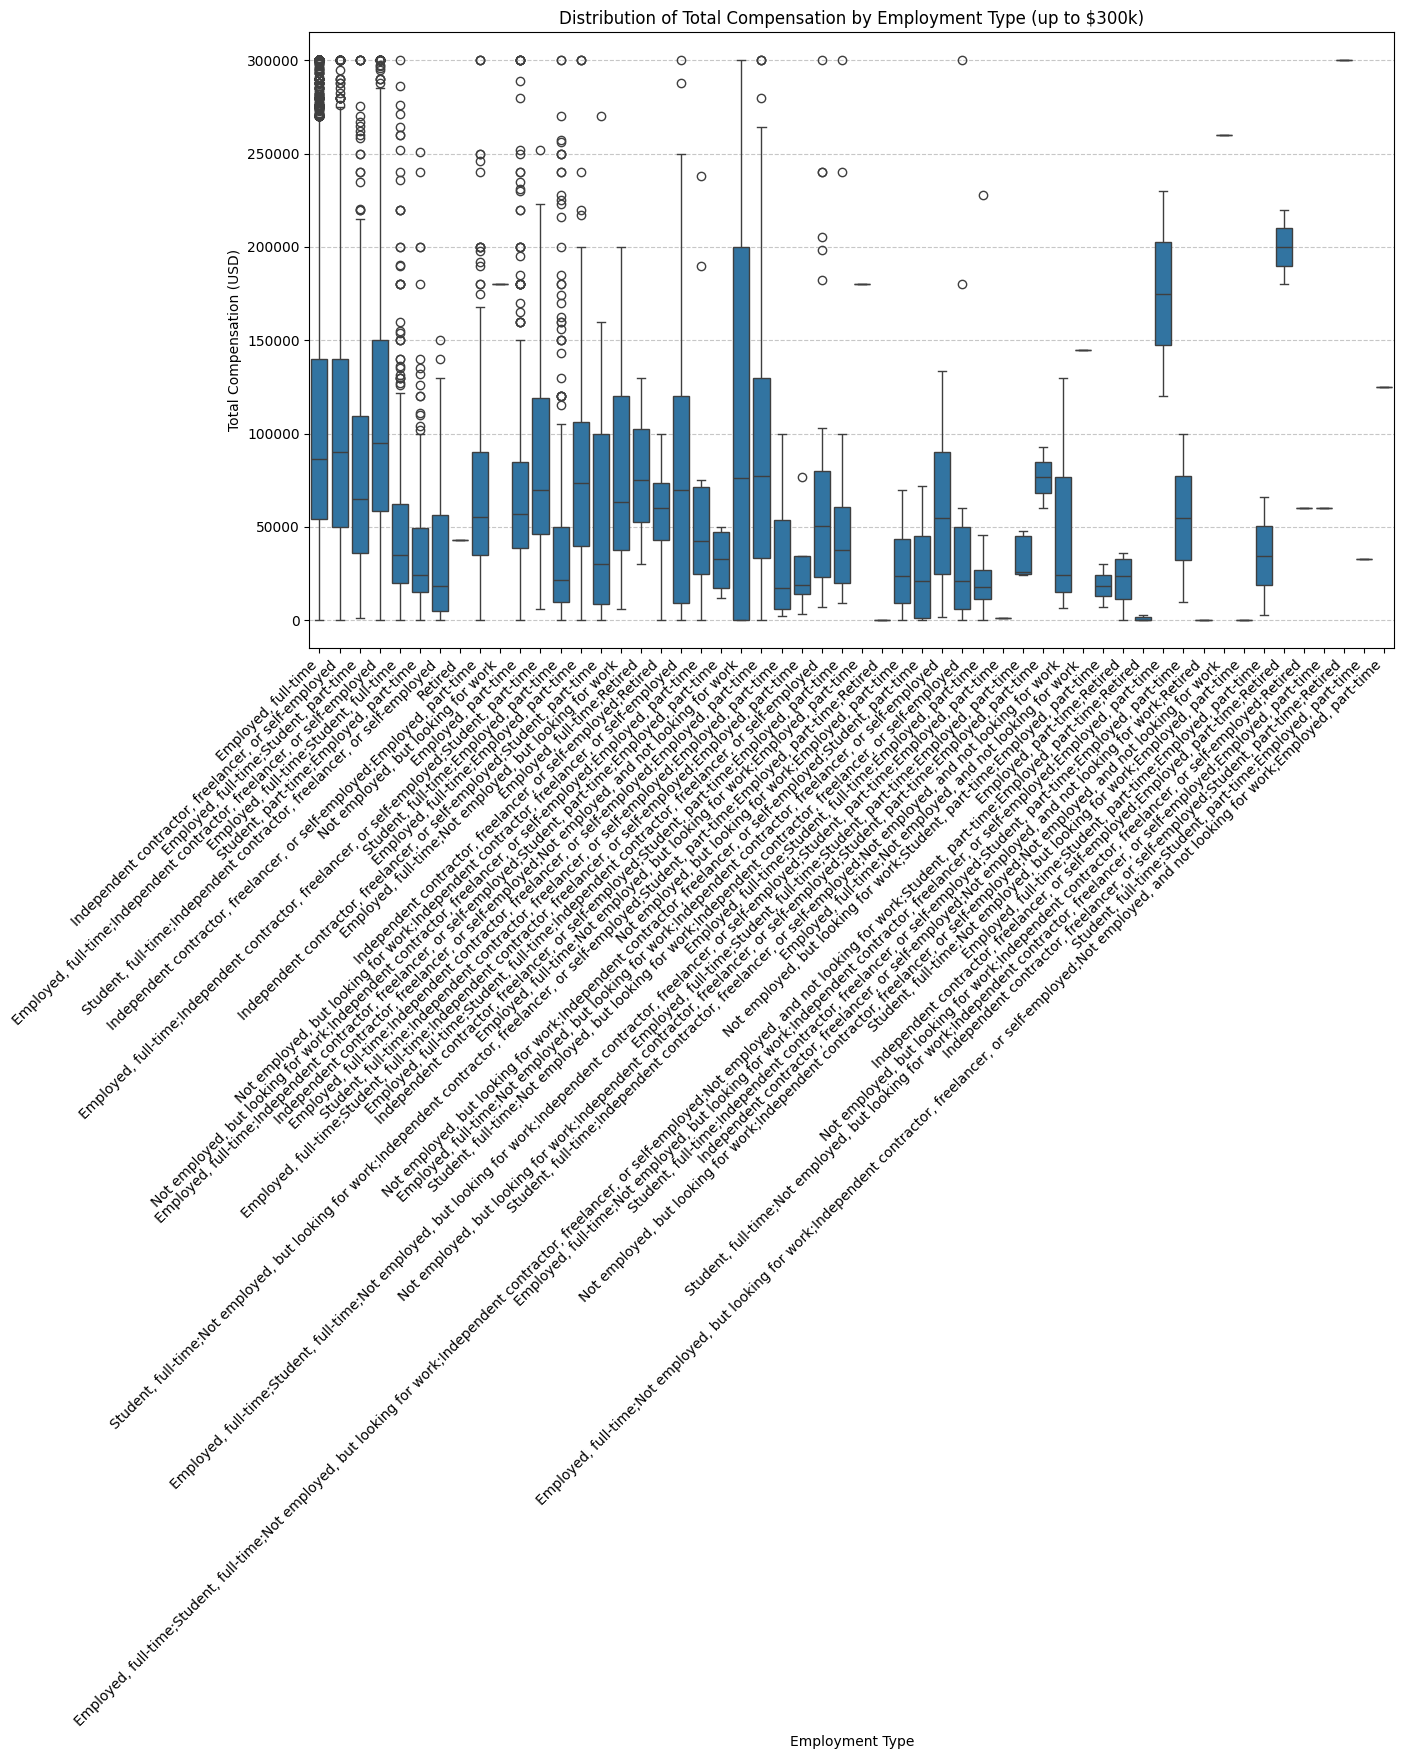

In [17]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# --- Task: Box Plot of CompTotal Across Employment Types ---

# Define the SQL query to select 'Employment' and 'CompTotal'
QUERY = "SELECT Employment, CompTotal FROM main"

# Execute the query and load the result into a pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# --- Data Cleaning and Preparation ---
# Drop rows where either column is missing
df.dropna(subset=['Employment', 'CompTotal'], inplace=True)

# Filter out extreme salary outliers for a clearer plot
df_filtered = df[df['CompTotal'] <= 300000]


# --- Visualization with a Box Plot ---
plt.figure(figsize=(14, 8))
sns.boxplot(x='Employment', y='CompTotal', data=df_filtered)

# Add titles and labels for clarity
plt.title('Distribution of Total Compensation by Employment Type (up to $300k)')
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation (USD)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Close the database connection
conn.close()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [ ]:
# your code goes here

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
